## Data Augmentation

### Step 1：将图像复制到training、validation和test的目录下

In [ ]:
import os, shutil

# 原始数据集目录
original_dataset_dir = '/Users/dongdongdongdong/Desktop/dogs-vs-cats/train' 

# 保存较小数据集的目录
base_dir = '/Users/dongdongdongdong/Desktop/dogs-vs-cats-small'
os.mkdir(base_dir)

# training set目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# validation set目录
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# test set目录
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 猫的training图像目录🐱
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 狗的training图像目录🐶
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 猫的validation图像目录🐱
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 狗的validation图像目录🐶
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 猫的test图像目录🐱
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 狗的test图像目录🐶
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 将前1000张图像复制到train_cats_dir🐱
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将接下来500张图像复制到validation_cats_dir🐱
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来500张图像复制到test_cats_dir🐱
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将前1000张图像复制到train_dogs_dir🐶
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 将接下来500张图像复制到validation_dogs_dir🐶
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来500张图像复制到test_dogs_dir🐶
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

### Step 2：利用ImageDataGenerator来设置Data Augmentation

In [16]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

### Step 3：显示几个随机增强后的training图像

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] # 选择一张图像进行data augmentation

img = image.load_img(img_path, target_size=(150, 150)) # 读取图像并调整大小

x = image.img_to_array(img) # 将图像转换为形状为(150, 150, 3)的numpy array

x.reshape((1,) + x.shape) # 将图像转换为形状为(1, 150, 150, 3)的numpy array

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.show(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

### Step 4：定义一个包含dropout的CNN：

In [24]:
from keras import optimizers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

### Step 5：利用data augmentation训练CNN

In [25]:
train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0 / 255) # 注意，不能augment验证数据

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 75s 753ms/step - loss: 0.6902 - acc: 0.5364 - val_loss: 0.6937 - val_acc: 0.5108
Epoch 2/100
100/100 [==============================] - 72s 718ms/step - loss: 0.6758 - acc: 0.5717 - val_loss: 0.6523 - val_acc: 0.6047
Epoch 3/100
100/100 [==============================] - 70s 700ms/step - loss: 0.6631 - acc: 0.5814 - val_loss: 0.6410 - val_acc: 0.6275
Epoch 4/100
100/100 [==============================] - 72s 721ms/step - loss: 0.6446 - acc: 0.6124 - val_loss: 0.6164 - val_acc: 0.6358
Epoch 5/100
100/100 [==============================] - 62s 624ms/step - loss: 0.6362 - acc: 0.6389 - val_loss: 0.6111 - val_acc: 0.6478
Epoch 6/100
100/100 [==============================] - 63s 625ms/step - loss: 0.6214 - acc: 0.6420 - val_loss: 0.5732 - val_acc: 0.6929
Epoch 7/100
100/100 [==============================] - 72s 716ms/step - loss: 0.6081 - acc: 0.6616 - val_loss: 0.5790 - val_acc: 0.6789
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 59s 591ms/step - loss: 0.4027 - acc: 0.8204 - val_loss: 0.4244 - val_acc: 0.8160
Epoch 62/100
100/100 [==============================] - 60s 599ms/step - loss: 0.4055 - acc: 0.8207 - val_loss: 0.4614 - val_acc: 0.7773
Epoch 63/100
100/100 [==============================] - 59s 594ms/step - loss: 0.3994 - acc: 0.8131 - val_loss: 0.4017 - val_acc: 0.8299
Epoch 64/100
100/100 [==============================] - 59s 589ms/step - loss: 0.3971 - acc: 0.8308 - val_loss: 0.4311 - val_acc: 0.7982
Epoch 65/100
100/100 [==============================] - 60s 596ms/step - loss: 0.3848 - acc: 0.8310 - val_loss: 0.4522 - val_acc: 0.8071
Epoch 66/100
100/100 [==============================] - 59s 593ms/step - loss: 0.3883 - acc: 0.8185 - val_loss: 0.4461 - val_acc: 0.8014
Epoch 67/100
100/100 [==============================] - 68s 677ms/step - loss: 0.3946 - acc: 0.8232 - val_loss: 0.4145 - val_acc: 0.8115
Epoch 68/100
100/100 [===================

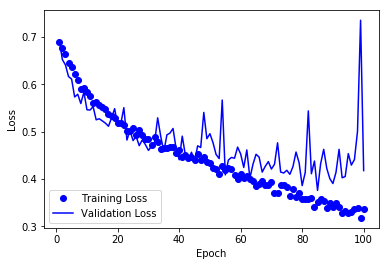

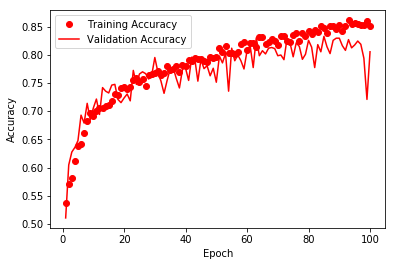

In [30]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
model.save('cats_and_dogs_small_2.h5')